In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import os

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback, EarlyStopping

%matplotlib inline

In [104]:
Q2_cut = 100

In [105]:
def split_trval(x_data, y_data, perc = 0.3):
    size_val = round(x_data.shape[0]*perc)
    if size_val > 0:
        idx = np.random.choice(np.arange(1, x_data.shape[0]-1, 2), size_val, replace=False)
        x_val = x_data[idx]
        y_val = y_data[idx]
        x_tr = np.delete(x_data, idx, axis = 0)
        y_tr = np.delete(y_data, idx)
    else:
        x_tr = x_data
        y_tr = y_data
        x_val = None
        y_val = None
    return x_tr, y_tr, x_val, y_val, size_val

In [143]:
# Load data
filenames = os.listdir("./data")
filenames = ["DATA_CHORUS_0.02.yaml"]

for i, filename in enumerate(filenames):
    with open("./data/" + filename, "r") as file:
        input_data = yaml.safe_load(file)
    
    x = input_data["x"]
    Q2 = np.array(input_data["Q2"])
    F_2 = np.array(input_data["F_2"])
    
    Q2_mask = np.where(Q2<Q2_cut)
    Q2 = Q2[Q2_mask]
    F_2 = F_2[Q2_mask]
    
    if i == 0:
        x_data = np.zeros((len(Q2), 2))
        x_data[:, 0] = x
        x_data[:, 1] = Q2 
        y_data = F_2
        x_tr, y_tr, x_val, y_val, size_val = split_trval(x_data, y_data)
    else:
        x_data = np.zeros((len(Q2), 2))
        x_data[:, 0] = x
        x_data[:, 1] = Q2 
        y_data = F_2
        x_tr_new, y_tr_new, x_val_new, y_val_new, size_val = split_trval(x_data, y_data)
        
        x_tr = np.concatenate([x_tr, x_tr_new], axis = 0)
        y_tr = np.concatenate([y_tr, y_tr_new], axis = 0)
        if size_val != 0:
            x_val = np.concatenate([x_val, x_val_new], axis = 0)
            y_val = np.concatenate([y_val, y_val_new], axis = 0)

print(x_data.shape)
print(y_data.shape)

(6, 2)
(6,)


In [144]:
# Create the NN model
model = Sequential()
model.add(Dense(units = 1, activation = 'linear', input_shape=[2]))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam", metrics=["accuracy"])

# Display the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_33 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 1,156
Trainable params: 1,156
Non-trainable params: 0
_________________________________________________________________


In [147]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
model.fit(x_tr, y_tr, validation_data=(x_val ,y_val), epochs=1000, batch_size=1, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 0s 24ms/step - loss: 6.8655e-05 - accuracy: 0.0000e+00 - val_loss: 1.7098e-04 - val_accuracy: 0.0000e+00
Epoch 2/1000
4/4 [==============================] - 0s 24ms/step - loss: 3.9014e-05 - accuracy: 0.0000e+00 - val_loss: 4.1092e-04 - val_accuracy: 0.0000e+00
Epoch 3/1000
4/4 [==============================] - 0s 24ms/step - loss: 1.1761e-04 - accuracy: 0.0000e+00 - val_loss: 3.1075e-04 - val_accuracy: 0.0000e+00
Epoch 4/1000
4/4 [==============================] - 0s 23ms/step - loss: 2.3929e-05 - accuracy: 0.0000e+00 - val_loss: 1.7595e-04 - val_accuracy: 0.0000e+00
Epoch 5/1000
4/4 [==============================] - 0s 24ms/step - loss: 1.0069e-04 - accuracy: 0.0000e+00 - val_loss: 9.8326e-05 - val_accuracy: 0.0000e+00
Epoch 6/1000
4/4 [==============================] - 0s 24ms/step - loss: 2.5743e-04 - accuracy: 0.0000e+00 - val_loss: 2.2246e-04 - val_accuracy: 0.0000e+00
Epoch 7/1000
4/4 [==============================] - 0s 23m

Epoch 53/1000
4/4 [==============================] - 0s 21ms/step - loss: 6.4010e-09 - accuracy: 0.0000e+00 - val_loss: 1.6879e-04 - val_accuracy: 0.0000e+00
Epoch 54/1000
4/4 [==============================] - 0s 22ms/step - loss: 6.8791e-09 - accuracy: 0.0000e+00 - val_loss: 1.6830e-04 - val_accuracy: 0.0000e+00
Epoch 55/1000
4/4 [==============================] - 0s 20ms/step - loss: 8.5399e-10 - accuracy: 0.0000e+00 - val_loss: 1.6740e-04 - val_accuracy: 0.0000e+00
Epoch 00055: early stopping


In [148]:
y_tr_pred = model.predict(x_tr)
y_val_pred = model.predict(x_val)

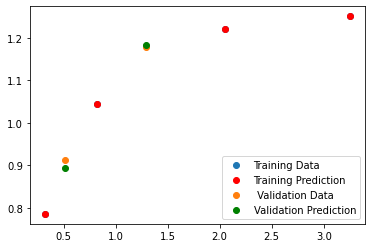

In [150]:
plt.scatter(x_tr[:,1], y_tr, label = "Training Data")
plt.scatter(x_tr[:,1], y_tr_pred, color = "red", label = "Training Prediction")
plt.scatter(x_val[:,1], y_val, label = " Validation Data")
plt.scatter(x_val[:,1], y_val_pred, color = "green", label = "Validation Prediction")
plt.legend()